In [1]:
import pandas as pd

## Trabajo de preparación

Importando los datos CSV de [electoralcommission.org.uk](http://www.electoralcommission.org.uk/find-information-by-subject/elections-and-referendums/upcoming-elections-and-referendums/eu-referendum/electorate-and-count-information)

Por cierto este es mi primer Jupyter notebook, que herramienta más cojonuda!

In [2]:
df = pd.read_csv("http://www.electoralcommission.org.uk/__data/assets/file/0014/212135/EU-referendum-result-data.csv")

## Checkeo de unos numeros

Vamos a ver si llegamos a los datos [del resumen de Financial Times](https://ig.ft.com/sites/elections/2016/uk/eu-referendum/index.html) ...

Dice por ejemplo: "The leave camp has won the day by 1,269,501 votes", corresponde con mis datos?

In [3]:
leave = df["Leave"].sum() 
remain = df["Remain"].sum()
print("{} - {} = {}".format(leave, remain, (leave - remain)))

17410742 - 16141241 = 1269501


Leave ganó: 51,9% contra Remain 48,1%

In [4]:
leave / (remain + leave) *100

51.891841981441154

Algún checkeo más: [electoralcommission.org.uk](http://www.electoralcommission.org.uk/find-information-by-subject/elections-and-referendums/upcoming-elections-and-referendums/eu-referendum/electorate-and-count-information) - donde saqué el CSV - habla de: 

- Total Electorate: 46,500,001
- Turnout: 72.2%
- Rejected Ballots: 25,359

In [5]:
electorate = df['Electorate'].sum(); electorate

46500001

In [6]:
turnout = (leave + remain) / electorate * 100; turnout

72.1548005988215

In [7]:
rejected = df.Rejected_Ballots.sum(); rejected

25359

## Areas locales más a favor / en contra de salir

Vale, ahora la parte más divertida, el analysis con plots de los areas locales y después las regiones ...

In [8]:
%matplotlib inline

Como voy a hacer un plot de porcentajes, añadimos los porcentajes de leave / remain al DataFrame.

Cierto esto era mucho prueba-y-error, estáis viendo la versión limpia del notebook ;)

Vamos a ver el area más a favor de salir de la Unión:

In [9]:
dfa = df.groupby("Area").sum()
dfa.head()
dfa["Perc_leave"] = dfa["Leave"] / (dfa["Remain"] + dfa["Leave"]) * 100
dfa["Perc_remain"] = dfa["Remain"] / (dfa["Remain"] + dfa["Leave"]) * 100

In [10]:
dfa.head(3)

,id,Electorate,ExpectedBallots,VerifiedBallotPapers,Pct_Turnout,Votes_Cast,Valid_Votes,Remain,Leave,Rejected_Ballots,No_official_mark,Voting_for_both_answers,Writing_or_mark,Unmarked_or_void,Pct_Remain,Pct_Leave,Pct_Rejected,Perc_leave,Perc_remain
Area,,,,,,,,,,,,,,,,,,,
Aberdeen City,148,154266,104809,104809,67.94,104809,104714,63985,40729,95,0,34,2,59,61.10,38.90,0.09,38.895468,61.104532
Aberdeenshire,149,196809,139014,139014,70.63,139014,138961,76445,62516,53,0,19,1,33,55.01,44.99,0.04,44.988162,55.011838
Adur,368,48755,37253,37251,76.40,37251,37229,16914,20315,22,0,8,0,14,45.43,54.57,0.06,54.567676,45.432324


In [11]:
top5_leave = dfa[["Perc_leave", "Perc_remain"]].sort_values(by="Perc_leave", ascending=False)[0:5]
top5_leave.head()

,Perc_leave,Perc_remain
Area,,
Boston,75.562426,24.437574
South Holland,73.586278,26.413722
Castle Point,72.699392,27.300608
Thurrock,72.282146,27.717854
Great Yarmouth,71.504947,28.495053


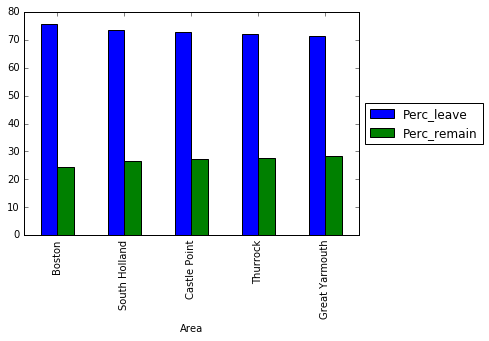

In [12]:
plt1 = top5_leave.plot(kind="bar")
plt1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Boston está en el extremo. A ver el otro extremo: quién está más a favor de quedar? Simplemente variamos unos parametros:

In [13]:
top5_remain = dfa[["Perc_leave", "Perc_remain"]].sort_values(by="Perc_leave", ascending=False)[-5:]
top5_remain.head()

,Perc_leave,Perc_remain
Area,,
City of London,24.710161,75.289839
Haringey,24.426998,75.573002
Hackney,21.519583,78.480417
Lambeth,21.377639,78.622361
Gibraltar,4.085381,95.914619


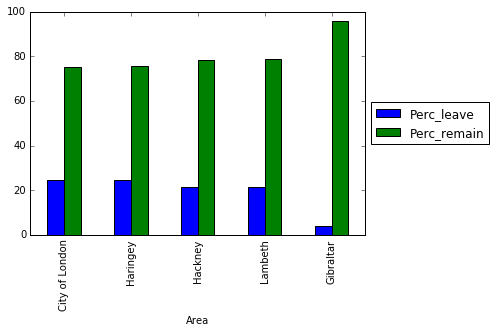

In [14]:
plt2 = top5_remain.plot(kind="bar")
plt2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Y vemos un pico de Gibraltar!

## Regiones

Ahora a ver qué regiones son más a favor / en contra:

In [15]:
dfr = df.groupby("Region").sum()

In [16]:
# ok proxima vez deberia definir un metodo quiza
dfr["Perc_leave"] = dfr["Leave"] / (dfr["Remain"] + dfr["Leave"]) * 100
dfr["Perc_remain"] = dfr["Remain"] / (dfr["Remain"] + dfr["Leave"]) * 100

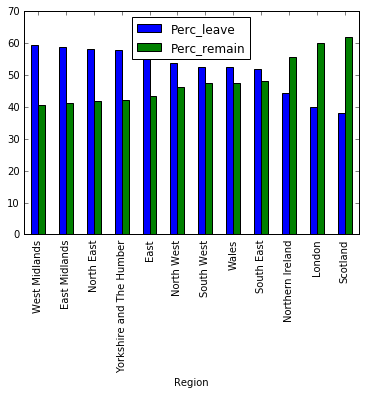

In [17]:
dfr[["Perc_leave", "Perc_remain"]].sort_values(by="Perc_leave", ascending=False).plot(kind="bar")

Vemos que Escocia, Londres y Irlanda quieren quedarse, Los Midlands quieren salir. 

Aquí me hubiera gustado tener más datos para hacer un análisis mas profundo (aprendiendo mas Pandas). 

En [la economía de Inglaterra por región en Wikipedia](https://en.wikipedia.org/wiki/Economy_of_the_United_Kingdom?oldformat=true#Economy_by_region) se ve por ejemplo una relación clara entre el GVA de las regiones y su voto (más prosperidad mas a favor de quedarse en la unión). 

También me hubiera gustado ver la influencia de edad y educación, [como pudo sacar FT Data](http://blogs.ft.com/ftdata/2016/06/24/brexit-demographic-divide-eu-referendum-results/) pero no tenía más datos.

<table class="wikitable">
<tr>
<th>Rank</th>
<th>Place</th>
<th>GVA per capita, 2013<sup id="cite_ref-GVA_153-1" class="reference"></sup></th>
</tr>
<tr>
<td align="right">1</td>
<td><a href="/wiki/Greater_London" title="Greater London">Greater London</a></td>
<td>£40,215</td>
</tr>
<tr>
<td align="right">2</td>
<td><a href="/wiki/South_East_England" title="South East England">South East England</a></td>
<td>£25,843</td>
</tr>
<tr>
<td align="right">3</td>
<td><a href="/wiki/East_of_England" title="East of England">East of England</a></td>
<td>£21,897</td>
</tr>
<tr>
<td align="right">4</td>
<td><a href="/wiki/South_West_England" title="South West England">South West England</a></td>
<td>£21,163</td>
</tr>
<tr>
<td align="right">5</td>
<td><a href="/wiki/North_West_England" title="North West England">North West England</a></td>
<td>£19,937</td>
</tr>
<tr>
<td align="right">6</td>
<td><a href="/wiki/West_Midlands_(region)" title="West Midlands (region)">West Midlands</a></td>
<td>£19,428</td>
</tr>
<tr>
<td align="right">7</td>
<td><a href="/wiki/East_Midlands" title="East Midlands">East Midlands</a></td>
<td>£19,317</td>
</tr>
<tr>
<td align="right">8</td>
<td><a href="/wiki/Yorkshire_and_the_Humber" title="Yorkshire and the Humber">Yorkshire and the Humber</a></td>
<td>£19,053</td>
</tr>
<tr>
<td align="right">9</td>
<td><a href="/wiki/North_East_England" title="North East England">North East England</a></td>
<td>£17,381</td>
</tr>
</table>

Interesante! 

Y aquí llegamos a final, aprendí lo suficiente Pandas "para ser peligroso", conseguí representar [los resultados de FT](https://ig.ft.com/sites/elections/2016/uk/eu-referendum/index.html) con Pandas en este Notebook.